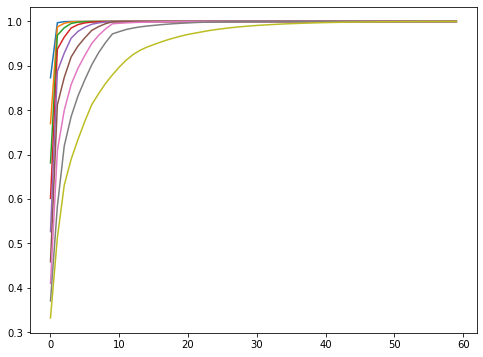

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_pca(a, nsim, nval=None):
    # Eigenvalue decomposition
    vals, vecs = np.linalg.eigh(a)

    # sort values in descending order and corresponding vectors
    sorted_index = np.argsort(vals)[::-1]
    vals = vals[sorted_index]
    vecs = vecs[:, sorted_index]

    tv = sum(vals)

    posv = np.where(vals >= 1e-8)[0]
    if nval is not None:
        if nval < posv.shape[0]:
            posv = posv[:nval]
       
    vals = vals[posv]
    vecs = vecs[:, posv]

    print(f"Simulating with {posv.shape[0]} PC Factors: {sum(vals) / tv * 100}% total variance explained")
    B = vecs * np.diag(np.sqrt(vals))

    m = vals.shape[0]
    r = np.random.randn(m, nsim)

    return (B @ r).T


def weight(x, l):
    total = 0
    weight_list = []
    for i in range(1, x + 1):
        weight = (1 - l) * l ** (i - 1)
        weight_list.append(weight)
        total += weight
    weight_list = np.array(weight_list)
    norm = weight_list / total
    return norm


def ewcov(data, l):
    weights = weight(data.shape[1], l)
    error_matrix = data - data.mean(axis=1)
    ewcov = error_matrix @ np.diag(weights) @ error_matrix.T
    return cov
     

df = np.genfromtxt('DailyReturn.csv', delimiter=',').T
lambdas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(8, 6))
for i, lamb in enumerate(lambdas):
    cov = calculate_ewcov(my_data, lamb)
    cumulative_evr = PCA_cumulative_evr(cov)
    plt.plot(np.arange(my_data.shape[1]), cumulative_evr[:my_data.shape[1]], label=f"lambda = {lambdas[i]}")
